In [1]:
from data import *
from tree import FaceTree


In [2]:
# load data
# keypoints, images = processFacesData("training.csv")
keypoints, images = readFacesData("training.csv")
numImages = images.shape[0]
print("Number of images: ", numImages)
numTrain = int(numImages * 0.7)
numTest = numImages - numTrain
print("Number of training images: ", numTrain)
print("Number of test images: ", numTest)
numPoints = 15

trainImages = images[:numTrain]
testImages = images[numTrain:]
trainKeypoints = keypoints[:numTrain]
testKeypoints = keypoints[numTrain:]
edges = calculateEdges(trainKeypoints)

Number of images:  2140
Number of training images:  1498
Number of test images:  642


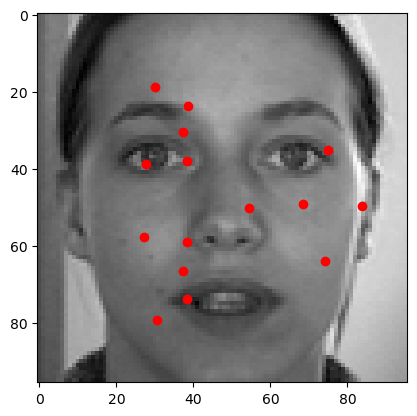

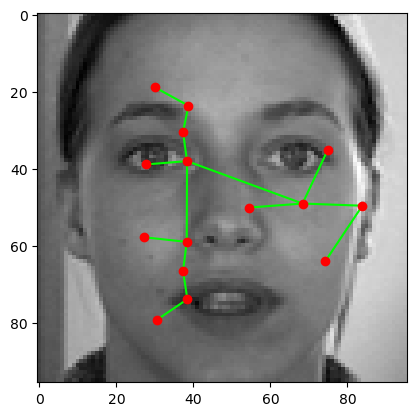

In [3]:
# visualize data
imNum = 12
visualizeFace(keypoints[imNum], images[imNum])
visualizeFaceGraph(keypoints[imNum], images[imNum], edges)

In [4]:
# train
t = FaceTree(edges, 13)
t.train(trainImages, trainKeypoints)

In [5]:
accuracy = t.evaluate(testImages, testKeypoints)
print("Accuracy: ", accuracy)

Evaluating on 642 images


 31%|███       | 196/642 [13:14<30:07,  4.05s/it]e:\uci\project-274b\tree.py:77: RuntimeWarning: invalid value encountered in divide
  return response / np.sqrt(np.sum(np.square(response), axis=2)).reshape(IM_DIM,IM_DIM,1)
100%|██████████| 642/642 [43:18<00:00,  4.05s/it]

Accuracy:  [array([[ -1.88221277,   2.30093617],
       [  1.9666383 ,   3.50331915],
       [ -0.95046809,   1.44204255],
       [ -3.32902128,   0.9266383 ],
       [  1.37838298,   2.81634043],
       [  3.92885106,   2.30093617],
       [  4.88953191,   0.656     ],
       [ -6.88646809,  -1.92034043],
       [ -2.57191489,   0.14093617],
       [  2.62740426,  -1.57685106],
       [  1.52680851,   3.84953191],
       [ -1.76      , -10.01361702],
       [  3.21838298,  -1.49855319],
       [  2.04221277,  -7.09378723],
       [  2.55761702,  -9.39948936]]), array([[ 4.53991489, -1.57276596],
       [ 2.98961702,  2.08544681],
       [ 4.57157447, -2.08544681],
       [-3.42229787, -2.93991489],
       [ 2.27438298,  1.74365957],
       [ 5.24289362,  0.54740426],
       [ 6.8946383 , -5.81344681],
       [-5.57412766, -5.64255319],
       [-3.19421277, -1.98434043],
       [ 5.78723404, -2.66791489],
       [ 3.67931915,  3.59795745],
       [ 0.88170213, -2.58587234],
       [ 5.

In [27]:
import pandas as pd
errors = np.stack(accuracy)
print(errors.shape)
print(np.linalg.norm(errors, axis=2).shape)
errors = np.mean(np.linalg.norm(errors, axis=2), axis=0)
print("Mean error: ", errors)
print("Mean error: ", np.mean(errors))
keys = pd.read_csv("training.csv").keys()
for i in range(15):
    # print with 3 digits
    print(keys[i * 2], ":", "{:.3f}".format(errors[i]))

(642, 15, 2)
(642, 15)
Mean error:  [ 5.55596133  5.218949    5.03665704  6.60971418  4.78485976  5.86360717
  6.11699908  8.00742101  7.17672712  7.75183611  8.97640003  9.31084016
  8.95943532 10.38847565  8.22038063]
Mean error:  7.198550908000005
left_eye_center_x : 5.556
right_eye_center_x : 5.219
left_eye_inner_corner_x : 5.037
left_eye_outer_corner_x : 6.610
right_eye_inner_corner_x : 4.785
right_eye_outer_corner_x : 5.864
left_eyebrow_inner_end_x : 6.117
left_eyebrow_outer_end_x : 8.007
right_eyebrow_inner_end_x : 7.177
right_eyebrow_outer_end_x : 7.752
nose_tip_x : 8.976
mouth_left_corner_x : 9.311
mouth_right_corner_x : 8.959
mouth_center_top_lip_x : 10.388
mouth_center_bottom_lip_x : 8.220


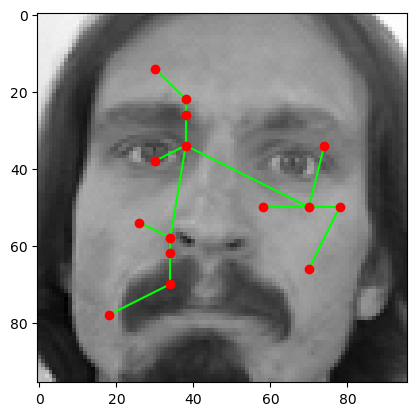

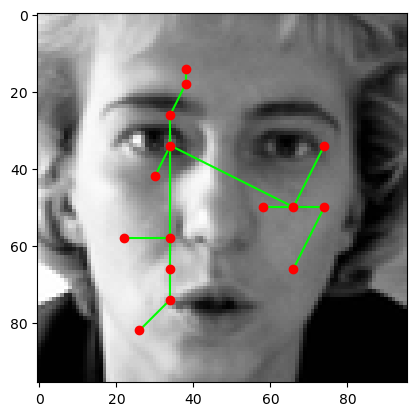

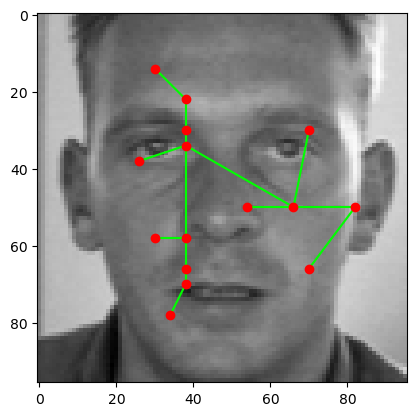

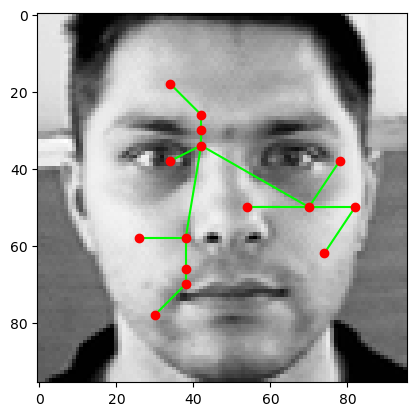

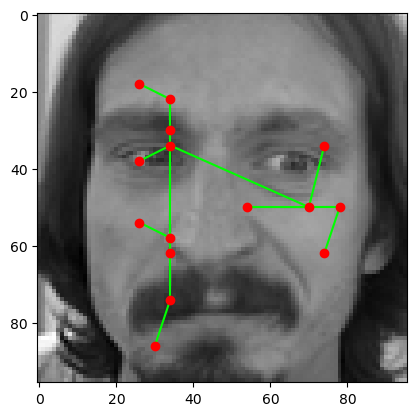

KeyboardInterrupt: 

In [6]:
# predict on training images
for i in range(15):
    im = trainImages[i]
    locations = t.predict(im)
    visualizeFaceGraph(locations, im, edges)

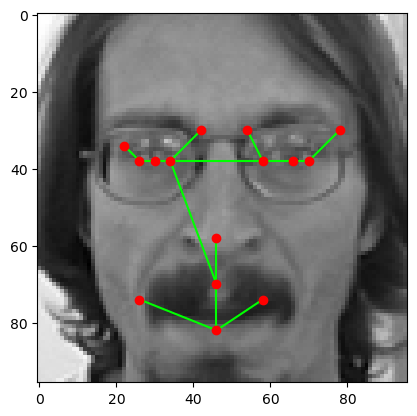

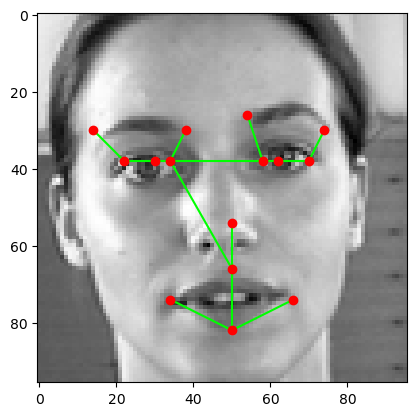

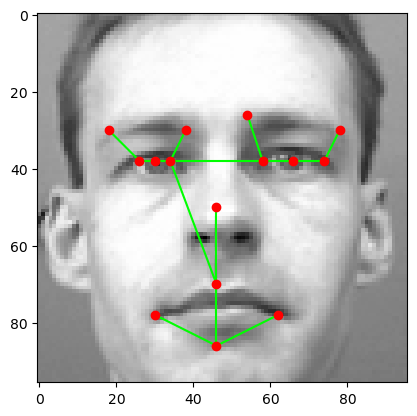

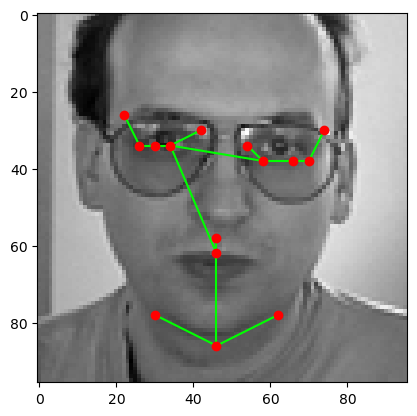

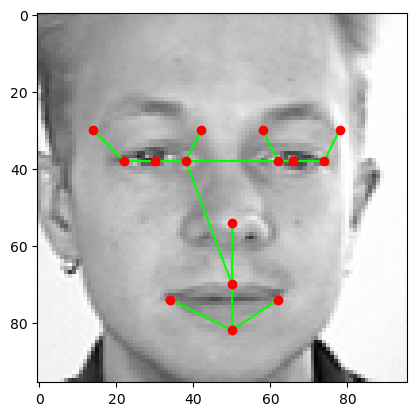

In [ ]:
# predict on test images
for i in range(5):
    im = testImages[i]
    locations = t.predict(im)
    visualizeFaceGraph(locations, im, edges)